In [1]:
import os
import numpy as np
import h5py

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.chdir("A:\DATA\Imartics\MLP05")

In [3]:
def load_dataset():
    
    train_data = h5py.File("train_happy.h5")
    X_train = np.array(train_data["train_set_x"][:]) 
    y_train = np.array(train_data["train_set_y"][:]) 

    test_data = h5py.File("test_happy.h5")
    X_test = np.array(test_data["test_set_x"][:])
    y_test = np.array(test_data["test_set_y"][:]) 
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset()

<ipython-input-3-141de597f55f>:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  train_data = h5py.File("train_happy.h5")
<ipython-input-3-141de597f55f>:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  test_data = h5py.File("test_happy.h5")


In [5]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


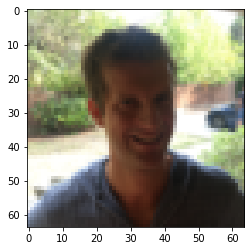

In [6]:
print("Image shape :",X_train_orig[10].shape)
plt.imshow(X_train_orig[9])

In [7]:
def HappyModel(input_shape):
    
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7,7), strides=(1,1), name='Conv2D')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), name='max_pool')(X)
    
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    model = Model(inputs = X_input, outputs=X, name='HappyModel')
        
    return model

In [8]:
happyModel = HappyModel(X_train[0].shape)

In [9]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
Conv2D (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [10]:
happyModel_sgd = HappyModel(X_train.shape[1:])
happyModel_sgd.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])

In [11]:
happyModel_sgd.fit?

In [12]:
history_sgd = happyModel_sgd.fit(X_train,Y_train, epochs=5,batch_size=30,validation_split=0.3)

Epoch 1/5
14/14 [==============================] - 2s 129ms/step - loss: 14.4957 - accuracy: 0.5119 - val_loss: 0.6240 - val_accuracy: 0.7556
Epoch 2/5
14/14 [==============================] - 2s 116ms/step - loss: 8.5088 - accuracy: 0.5524 - val_loss: 4.2314 - val_accuracy: 0.4667
Epoch 3/5
14/14 [==============================] - 2s 117ms/step - loss: 6.1458 - accuracy: 0.5452 - val_loss: 0.6096 - val_accuracy: 0.7000
Epoch 4/5
14/14 [==============================] - 2s 119ms/step - loss: 2.0145 - accuracy: 0.7452 - val_loss: 0.6299 - val_accuracy: 0.6833
Epoch 5/5
14/14 [==============================] - 2s 115ms/step - loss: 0.7871 - accuracy: 0.8357 - val_loss: 1.1873 - val_accuracy: 0.7056


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


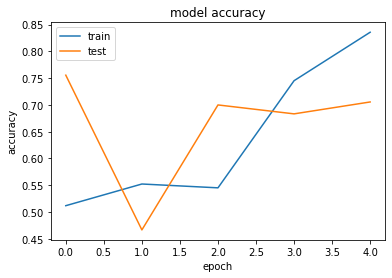

In [13]:
#list all data in history
print(history_sgd.history.keys())
# summarize history for accuracy
plt.plot(history_sgd.history['accuracy'])
plt.plot(history_sgd.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

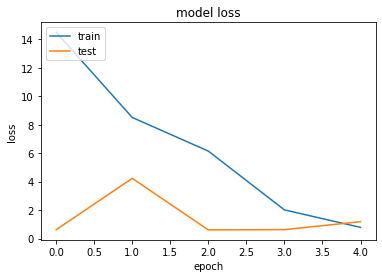

In [14]:
plt.plot(history_sgd.history['loss'])
plt.plot(history_sgd.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
preds = happyModel_sgd.evaluate(x=X_test, y=Y_test)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 19ms/step - loss: 1.7730 - accuracy: 0.6267

Loss = 1.7730422019958496
Test Accuracy = 0.6266666650772095


In [16]:
happyModel_rms = HappyModel(X_train.shape[1:])
happyModel_rms.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=["accuracy"])

history_rms = happyModel_rms.fit(X_train,Y_train, epochs=5,batch_size=30,validation_split=0.3)

Epoch 1/5
14/14 [==============================] - 2s 128ms/step - loss: 4.3372 - accuracy: 0.6024 - val_loss: 1.1769 - val_accuracy: 0.4611
Epoch 2/5
14/14 [==============================] - 2s 116ms/step - loss: 1.6072 - accuracy: 0.7024 - val_loss: 2.7001 - val_accuracy: 0.4667
Epoch 3/5
14/14 [==============================] - 2s 114ms/step - loss: 1.6137 - accuracy: 0.7476 - val_loss: 0.9988 - val_accuracy: 0.5389
Epoch 4/5
14/14 [==============================] - 2s 114ms/step - loss: 1.0628 - accuracy: 0.8048 - val_loss: 0.7910 - val_accuracy: 0.6278
Epoch 5/5
14/14 [==============================] - 2s 115ms/step - loss: 1.1835 - accuracy: 0.7690 - val_loss: 0.7103 - val_accuracy: 0.7389


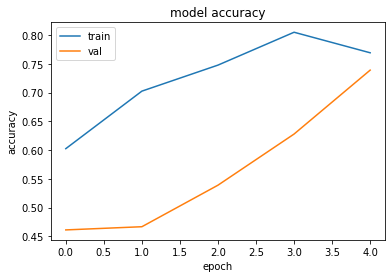

In [17]:
plt.plot(history_rms.history['accuracy'])
plt.plot(history_rms.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

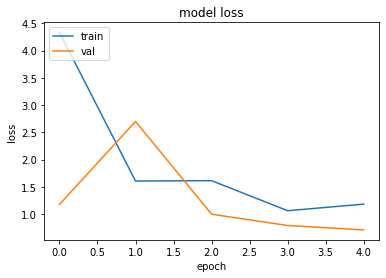

In [18]:
plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
preds = happyModel_rms.evaluate(x=X_test, y=Y_test)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 21ms/step - loss: 1.0499 - accuracy: 0.6733

Loss = 1.0499390363693237
Test Accuracy = 0.6733333468437195


In [20]:
happyModel_adam = HappyModel(X_train[0].shape)
happyModel_adam.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

history_adam = happyModel_adam.fit(X_train,Y_train, epochs=5,batch_size=30,validation_split = 0.3)

Epoch 1/5
14/14 [==============================] - 2s 121ms/step - loss: 1.0724 - accuracy: 0.6738 - val_loss: 0.5727 - val_accuracy: 0.7667
Epoch 2/5
14/14 [==============================] - 2s 114ms/step - loss: 0.2945 - accuracy: 0.8762 - val_loss: 0.6733 - val_accuracy: 0.5611
Epoch 3/5
14/14 [==============================] - 2s 117ms/step - loss: 0.1857 - accuracy: 0.9405 - val_loss: 0.6442 - val_accuracy: 0.5722
Epoch 4/5
14/14 [==============================] - 2s 114ms/step - loss: 0.1015 - accuracy: 0.9690 - val_loss: 0.5752 - val_accuracy: 0.6333
Epoch 5/5
14/14 [==============================] - 2s 114ms/step - loss: 0.0894 - accuracy: 0.9714 - val_loss: 0.6269 - val_accuracy: 0.5889


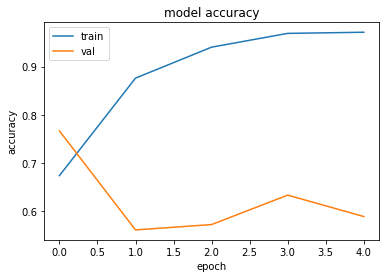

In [21]:
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

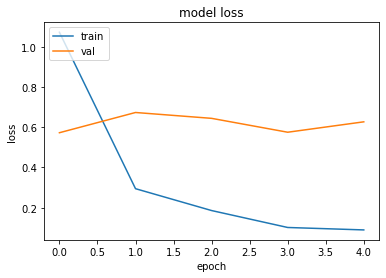

In [22]:
plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
preds = happyModel_adam.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 21ms/step - loss: 0.5848 - accuracy: 0.5933

Loss = 0.5848277807235718
Test Accuracy = 0.5933333039283752


In [24]:
#Predicting with different epochs trained models
happyModelE = HappyModel(X_train.shape[1:])
happyModelE.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

THistoryE = happyModelE.fit(X_train,Y_train, epochs=20,batch_size=30,validation_split = 0.3)

Train on 420 samples, validate on 180 samples
Epoch 1/20
420/420 [==============================] - 7s 17ms/step - loss: 0.9818 - accuracy: 0.6595 - val_loss: 0.6230 - val_accuracy: 0.5333
Epoch 2/20
420/420 [==============================] - 6s 15ms/step - loss: 0.2372 - accuracy: 0.9071 - val_loss: 0.6808 - val_accuracy: 0.5222
Epoch 3/20
420/420 [==============================] - 6s 15ms/step - loss: 0.1595 - accuracy: 0.9452 - val_loss: 0.5633 - val_accuracy: 0.6222
Epoch 4/20
420/420 [==============================] - 6s 15ms/step - loss: 0.1930 - accuracy: 0.9238 - val_loss: 0.6866 - val_accuracy: 0.5444
Epoch 5/20
420/420 [==============================] - 6s 15ms/step - loss: 0.1290 - accuracy: 0.9548 - val_loss: 0.5464 - val_accuracy: 0.6778
Epoch 6/20
420/420 [==============================] - 7s 16ms/step - loss: 0.2059 - accuracy: 0.9143 - val_loss: 0.4139 - val_accuracy: 0.8389
Epoch 7/20
420/420 [==============================] - 6s 15ms/step - loss: 0.1157 - accuracy: 0.

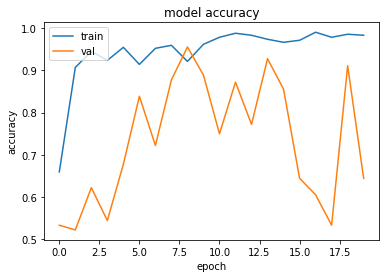

In [25]:
plt.plot(THistoryE.history['accuracy'])
plt.plot(THistoryE.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

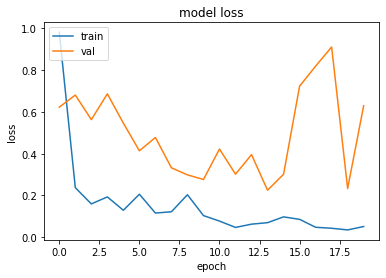

In [26]:
plt.plot(THistoryE.history['loss'])
plt.plot(THistoryE.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
preds = happyModelE.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.5516095042228699
Test Accuracy = 0.6800000071525574


In [28]:
y_pred = happyModelE.predict(X_test)

In [29]:
y_pred

array([[0.99966884],
       [0.986062  ],
       [0.9993279 ],
       [0.9998915 ],
       [0.96615183],
       [0.997027  ],
       [0.99728715],
       [0.7305349 ],
       [0.99749684],
       [0.58382833],
       [0.9846027 ],
       [0.8084895 ],
       [0.9500963 ],
       [0.8891045 ],
       [0.83582777],
       [0.99523085],
       [0.2317087 ],
       [0.99217516],
       [0.3640301 ],
       [0.9998108 ],
       [0.996317  ],
       [0.99852824],
       [0.8167815 ],
       [0.9990822 ],
       [0.2008385 ],
       [0.35964805],
       [0.9915632 ],
       [0.44345003],
       [0.70298606],
       [0.9932366 ],
       [0.9979055 ],
       [0.99657106],
       [0.9971564 ],
       [0.9999406 ],
       [0.9992204 ],
       [0.99929917],
       [0.93128645],
       [0.63211656],
       [0.88002264],
       [0.71022195],
       [0.9855292 ],
       [0.5833264 ],
       [0.62968963],
       [0.46507138],
       [0.999913  ],
       [0.5432432 ],
       [0.5889951 ],
       [0.321

In [30]:
y_pred[y_pred < 0.5] = 0
y_pred[y_pred >= 0.5] = 1

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[18 48]
 [ 0 84]]


In [32]:
#### Increasing the Epochs to 30

happyModel3 = HappyModel(X_train.shape[1:])
happyModel3.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])

# THistory (Train History)
THistory3 = happyModel3.fit(X_train,Y_train, epochs=30,batch_size=30,validation_split = 0.3)

Train on 420 samples, validate on 180 samples
Epoch 1/30
420/420 [==============================] - 7s 17ms/step - loss: 2.3046 - accuracy: 0.5905 - val_loss: 0.6557 - val_accuracy: 0.5056
Epoch 2/30
420/420 [==============================] - 6s 15ms/step - loss: 0.4446 - accuracy: 0.8333 - val_loss: 0.5822 - val_accuracy: 0.6556
Epoch 3/30
420/420 [==============================] - 6s 15ms/step - loss: 0.2589 - accuracy: 0.8810 - val_loss: 0.5656 - val_accuracy: 0.6667
Epoch 4/30
420/420 [==============================] - 6s 15ms/step - loss: 0.2370 - accuracy: 0.8833 - val_loss: 0.6213 - val_accuracy: 0.5667
Epoch 5/30
420/420 [==============================] - 6s 15ms/step - loss: 0.1477 - accuracy: 0.9333 - val_loss: 0.5428 - val_accuracy: 0.6944
Epoch 6/30
420/420 [==============================] - 6s 15ms/step - loss: 0.1117 - accuracy: 0.9619 - val_loss: 0.4967 - val_accuracy: 0.7222
Epoch 7/30
420/420 [==============================] - 6s 15ms/step - loss: 0.0954 - accuracy: 0.

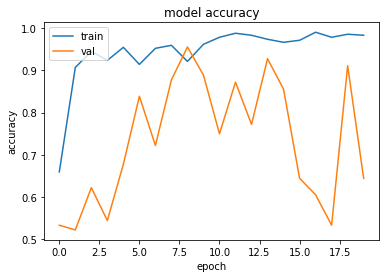

In [33]:
plt.plot(THistoryE.history['accuracy'])
plt.plot(THistoryE.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

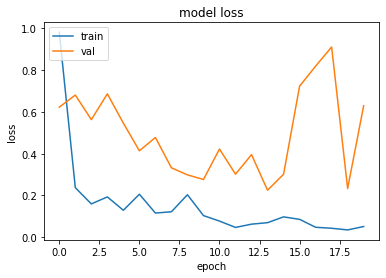

In [34]:
# summarize history for loss
plt.plot(THistoryE.history['loss'])
plt.plot(THistoryE.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
preds = happyModel3.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.11046543876330057
Test Accuracy = 0.95333331823349


In [36]:
happyModel2 = HappyModel(X_train[0].shape)
happyModel2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
THistory2 = happyModel2.fit(X_train,Y_train, epochs=40,batch_size=16,validation_split = 0.3)

Train on 420 samples, validate on 180 samples
Epoch 1/40
420/420 [==============================] - 7s 17ms/step - loss: 1.7100 - accuracy: 0.6333 - val_loss: 0.5787 - val_accuracy: 0.7778
Epoch 2/40
420/420 [==============================] - 6s 15ms/step - loss: 0.4985 - accuracy: 0.8000 - val_loss: 0.6250 - val_accuracy: 0.6056
Epoch 3/40
420/420 [==============================] - 6s 15ms/step - loss: 0.3534 - accuracy: 0.8905 - val_loss: 0.6866 - val_accuracy: 0.6556
Epoch 4/40
420/420 [==============================] - 7s 16ms/step - loss: 0.1544 - accuracy: 0.9262 - val_loss: 0.5213 - val_accuracy: 0.6611
Epoch 5/40
420/420 [==============================] - 7s 16ms/step - loss: 0.1149 - accuracy: 0.9548 - val_loss: 0.4166 - val_accuracy: 0.7722
Epoch 6/40
420/420 [==============================] - 7s 16ms/step - loss: 0.0833 - accuracy: 0.9714 - val_loss: 0.2805 - val_accuracy: 0.9389
Epoch 7/40
420/420 [==============================] - 7s 16ms/step - loss: 0.0608 - accuracy: 0.

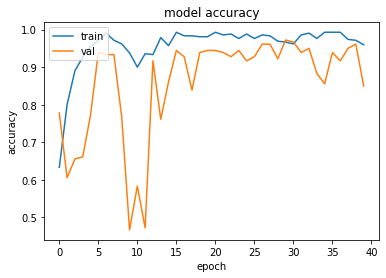

In [37]:
# summarize history for accuracy
plt.plot(THistory2.history['accuracy'])
plt.plot(THistory2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

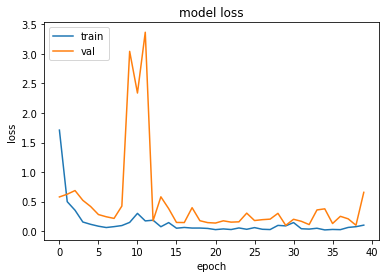

In [38]:
# summarize history for loss
plt.plot(THistory2.history['loss'])
plt.plot(THistory2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [39]:
preds2 = happyModel2.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds2[0]))
print ("Test Accuracy = " + str(preds2[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.8456250301996867
Test Accuracy = 0.800000011920929


In [40]:
#Predicting using the Lee Net Architecture

In [41]:
# Building LeNet-5 
def create_model():
    model = Sequential()
    model.add(layers.Conv2D(filters=1, kernel_size=(1,1), strides=(2,2), name='Conv2D', input_shape=(64,64,3))) 
    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(units=120, activation='relu'))

    model.add(layers.Dense(units=84, activation='relu'))

    model.add(layers.Dense(units=1, activation = 'sigmoid'))
    
    return model

In [42]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D (Conv2D)              (None, 32, 32, 1)         4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)              

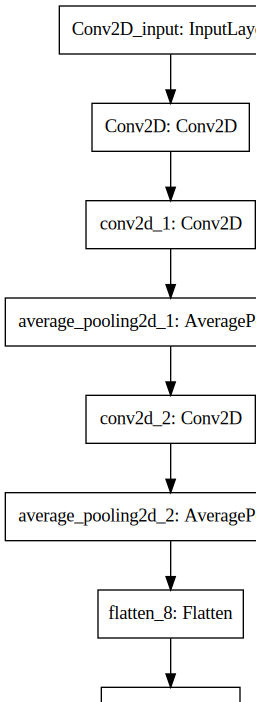

In [43]:
plot_model(model, to_file='HappyModel.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [44]:
lenet5 = create_model()
lenet5.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
lenet_history = lenet5.fit(X_train,Y_train, epochs=20,batch_size=32,validation_split = 0.3)

Train on 420 samples, validate on 180 samples
Epoch 1/20
420/420 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5452 - val_loss: 0.6852 - val_accuracy: 0.5833
Epoch 2/20
420/420 [==============================] - 0s 804us/step - loss: 0.6751 - accuracy: 0.6071 - val_loss: 0.6805 - val_accuracy: 0.5667
Epoch 3/20
420/420 [==============================] - 0s 765us/step - loss: 0.6618 - accuracy: 0.5524 - val_loss: 0.6462 - val_accuracy: 0.6500
Epoch 4/20
420/420 [==============================] - 0s 800us/step - loss: 0.6237 - accuracy: 0.6524 - val_loss: 0.6041 - val_accuracy: 0.6778
Epoch 5/20
420/420 [==============================] - 0s 756us/step - loss: 0.5885 - accuracy: 0.6667 - val_loss: 0.5840 - val_accuracy: 0.6667
Epoch 6/20
420/420 [==============================] - 0s 819us/step - loss: 0.5203 - accuracy: 0.7190 - val_loss: 0.5169 - val_accuracy: 0.7278
Epoch 7/20
420/420 [==============================] - 0s 819us/step - loss: 0.4710 - accurac

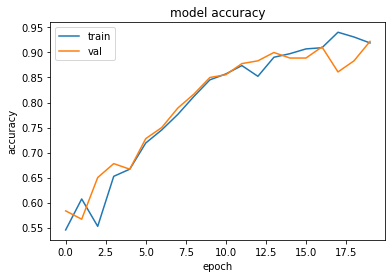

In [45]:
# summarize history for accuracy
plt.plot(lenet_history.history['accuracy'])
plt.plot(lenet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

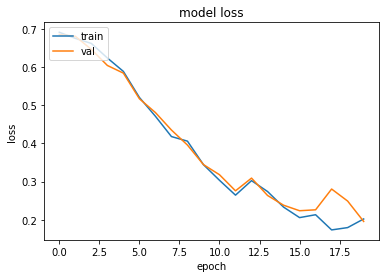

In [46]:
# summarize history for loss
plt.plot(lenet_history.history['loss'])
plt.plot(lenet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
preds = lenet5.evaluate(x=X_test, y=Y_test)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s 629us/step

Loss = 0.3135183537006378
Test Accuracy = 0.8666666746139526


In [2]:
path = 'A:\DATA\Imartics\MLP05\IMG_20170914_135217.jpg'

img = image.load_img(path, target_size=(2040,2040)) 

plt.imshow(img)

NameError: name 'image' is not defined